# Automated CAPTCHA Solving With Deep Learning

This notebook demonstrates the use of convolutional neural networks and supervised training to automate CAPTCHA-solving. 

Original Author: Jackon Yang (2017)

Further Modified By: Turhan Kimbrough (2021)

---

In [1]:
import os

# Functions from other notebook file.
from ipynb.fs.full.shared_functions import *

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
# GLOBALS
DATA_DIRECTORY = os.path.join(os.getcwd() + '/datasets/vgg-16-data')

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_CHANNELS = 3

CATEGORIES = 10 # represents digits 0-9
DIMENSIONS = 4  # 4-digit CAPTCHA images

TRAINING_EPOCHS = 20

TRAINING_BATCH_SIZE = 16
VALIDATION_BATCH_SIZE = 16
TESTING_BATCH_SIZE = 16

---
## Prepare the Dataset



Store each CAPTCHA-image file path with its respective label
into a pandas DataFrame.

In [5]:
data_frame = create_captcha_dataframe(DATA_DIRECTORY)
data_frame.head()

,label,file
0,1163,/mnt/wd-blue/captcha-tensorflow/datasets/vgg-1...
1,4262,/mnt/wd-blue/captcha-tensorflow/datasets/vgg-1...
2,2097,/mnt/wd-blue/captcha-tensorflow/datasets/vgg-1...
3,4147,/mnt/wd-blue/captcha-tensorflow/datasets/vgg-1...
4,6131,/mnt/wd-blue/captcha-tensorflow/datasets/vgg-1...


---
Shuffle the data and create a training set, validation set, and testing set.

In [6]:
train_indices, validation_indices, test_indices = shuffle_and_split_data(data_frame)

print('train count: %s, validation count: %s, test count: %s' % (
    len(train_indices), len(validation_indices), len(test_indices)))

train count: 4900, validation count: 2100, test count: 3000


---
## Get a baseline sequential model

In [7]:
model = create_untrained_vgg16_model(IMAGE_HEIGHT, 
                                     IMAGE_WIDTH, 
                                     IMAGE_CHANNELS,
                                     DIMENSIONS, 
                                     CATEGORIES)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

---
## Train the Model

In [8]:
history = train_model(model, 
                      data_frame, 
                      train_indices, 
                      validation_indices, 
                      TRAINING_BATCH_SIZE, 
                      VALIDATION_BATCH_SIZE, 
                      TRAINING_EPOCHS,
                      IMAGE_HEIGHT,
                      IMAGE_WIDTH,
                      CATEGORIES)

Epoch 1/20
306/306 [==============================] - 224s 632ms/step - loss: 2.3984 - accuracy: 0.0978 - val_loss: 2.3025 - val_accuracy: 0.1050
Epoch 2/20
306/306 [==============================] - 193s 631ms/step - loss: 2.3027 - accuracy: 0.1021 - val_loss: 2.3020 - val_accuracy: 0.1076
Epoch 3/20
306/306 [==============================] - 193s 631ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/20
306/306 [==============================] - 193s 631ms/step - loss: 2.3027 - accuracy: 0.1032 - val_loss: 2.3017 - val_accuracy: 0.1106
Epoch 5/20
306/306 [==============================] - 188s 615ms/step - loss: 2.3026 - accuracy: 0.1036 - val_loss: 2.3027 - val_accuracy: 0.0991
Epoch 6/20
306/306 [==============================] - 181s 593ms/step - loss: 2.3026 - accuracy: 0.1035 - val_loss: 2.3018 - val_accuracy: 0.1121
Epoch 7/20
306/306 [==============================] - 181s 593ms/step - loss: 2.3026 - accuracy: 0.1031 - val_loss: 2.3025 -

---
## Analyze Model Performance

Plot the accuracy and loss metrics

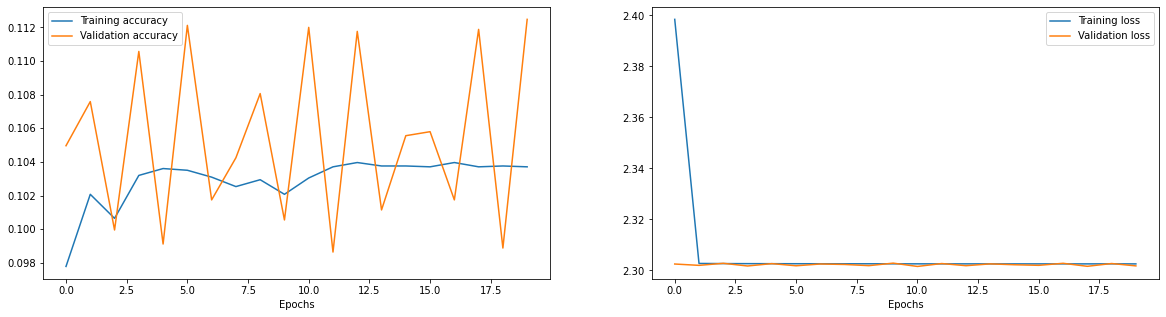

In [9]:
plot_training_history(history)

Use some 'unseen' test samples

In [10]:
for_training=False

testing_set_generator = get_captcha_generator(data_frame, 
                                              test_indices, 
                                              for_training, 
                                              TESTING_BATCH_SIZE,
                                              IMAGE_HEIGHT,
                                              IMAGE_WIDTH,
                                              CATEGORIES)

dict(zip(model.metrics_names, model.evaluate(testing_set_generator, 
                                             steps=len(test_indices)//TESTING_BATCH_SIZE)))

187/187 [==============================] - 34s 182ms/step - loss: 2.3035 - accuracy: 0.0949


{'loss': 2.3035221099853516, 'accuracy': 0.09491978585720062}

---
## Visualize Model Performance

In [16]:
captcha_images, predictions, true_values = get_prediction_results(model, 
                                                                  data_frame, 
                                                                  test_indices, 
                                                                  TESTING_BATCH_SIZE,
                                                                  IMAGE_HEIGHT,
                                                                  IMAGE_WIDTH,
                                                                  CATEGORIES)

NameError: name 'train_indices' is not defined

In [15]:
display_predictions_from_model(captcha_images, 
                               predictions, 
                               true_values)

NameError: name 'captcha_images' is not defined

## Save the Model

In [ ]:
#model.save('my_model')